## Loan Application Status Prediction

### Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

#### Independent Variables:

1.	Loan_ID - This refers to the unique identifier of the applicant's affirmed purchases.
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refers to persons who depends on the applicants for survival.
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owes at any given time.
10.	Loan_Amount_Term - This refers to the duration in which the loan is availed to the applicant.
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refers to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved (Loan_status) or not on the basis of the details provided in the dataset. 

### Dataset Link

https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


From above we can observe a combination of numeric and categorical data. The Loan_ID is a nominal variable that has no quantitative value whatsoever.
The target variable is Loan_Status which has values Y or N. This is a classification task.

### Exploratory Data Analysis

In [3]:
# Getting dimensions od the dataset
df.shape

(614, 13)

The dataset consists of 614 rows and 13 columns, out of which 1 variable is the target or output variable.

In [4]:
# Getting the column names
df.columns.to_list()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

The independent variables are:<br>
'Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area'

The target variable is:<br>
'Loan_Status'

In [5]:
# Checking datatype of each column
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

The dataset has object, int64 and float64 datatypes

In [6]:
# Checking for missing values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

As we can see, there are 13 missing values for Gender, 3 missing values for Married, 15 missing values for Dependents, 32 missing values for Self_Employed, 22 missing values for LoanAmount, and 14 missing values for Loan_Amount_Term. These missing values will be handled during Data preprocessing step before building the model.

In [7]:
# Checking for duplicates
df.duplicated().sum()

0

There are no duplicates in the dataset.

In [8]:
# Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


From above, we can get an overview of the dataset. As observed before, there are a few missing values.
We need to remove all irrelevant columns in the data preprocessing stage.

In [9]:
# Number of unique values for each variable
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

- From above it is clear that Gender, Married, Dependents, Education, Self_Employed, Property_Area and Loan_Status (target) are categorical variables.<br>
- Credit_History and Loan_Amount_Term are numeric and discrete variables.<br>
- Loan_ID has 614 unique values but it is a nominal variable, which does not have any quantitative value.
- ApplicantIncome, CoapplicantIncome, and LoanAmount are numerical and continuous variables.

In [10]:
# Frequency of occurence of each value in 'Gender' column
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

There are more Males than Females in the dataset.

In [11]:
# Frequency of occurence of each value in 'Married' column
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

There are more married applicants than unmarried ones.

In [12]:
# Frequency of occurence of each value in 'Dependents' column
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

There are more applicants with no dependants compared to applicants with dependents. From the values aboveit is clear that the datatype of this column is object due to '+' symbol. This variable is categorical, so we need not convert the datatype.

In [13]:
# Frequency of occurence of each value in 'Education' column
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

There are more Graduate applicants than Not Graduates.

In [14]:
# Frequency of occurence of each value in 'Self_Employed' column
df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

There are very less Self_Employed applicants in the dataset.

In [15]:
# Frequency of occurence of each value in 'Property_Area' column
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

There are fewer Rural areas than Urban or Semiurban.

In [16]:
# Frequency of occurence of each value in 'Loan_Status' column
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

There are more Loans that have been granted than that have not been granted. Since it is the target variable, we need to handle the class imbalance during model training.

In [17]:
# Frequency of occurence of each value in 'Credit_History' column
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

It is observed that most of the applicants have a Credit history.

In [18]:
# Frequency of occurence of each value in 'Loan_Amount_Term' column
df.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Maximum applicants seem to have a Loan_Amount_Term of 360.

In [19]:
num_cols = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
num_cols.columns.to_list()

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

#### Dataset description

In [20]:
# Statistical summary of columns (numerical data)
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Observations from the statistical summary:
- The mean is less than the median for Loan_Amount_Term and Credit_History.
- The mean is greater than the median for ApplicantIncome, CoapplicantIncome, and LoanAmount.
- Based on the 75% and max values, there seem to be several outliers as well.

#### Data Visualisation

In [21]:
# Setting uniform color palette
sns.set_palette(sns.color_palette("twilight"))

##### Univariate analysis

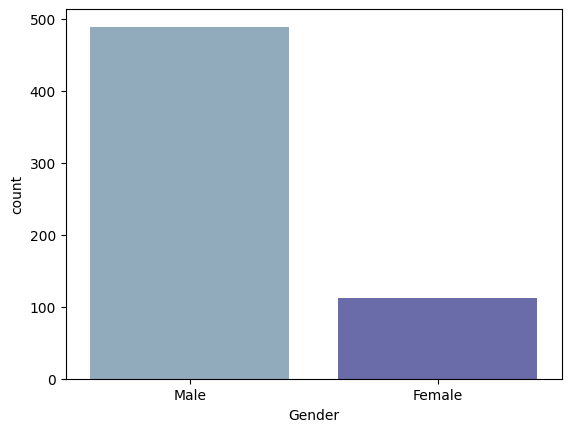

In [22]:
# Visualising the frequency of Gender in the dataset
sns.countplot(x=df.Gender)
plt.show()

There are more Male applicants than Female.

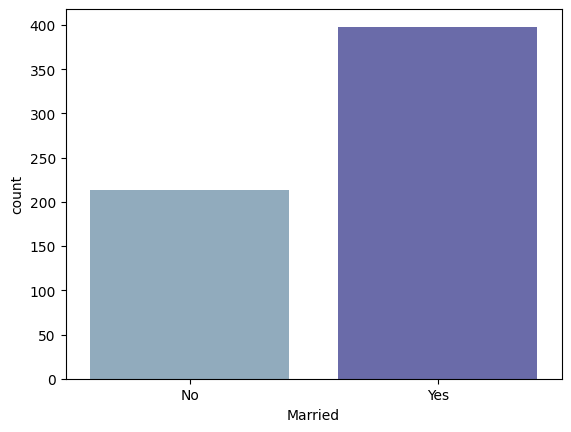

In [23]:
# Visualising the frequency of Married in the dataset
sns.countplot(x=df.Married)
plt.show()

There are more Married applicants than unmarried ones.

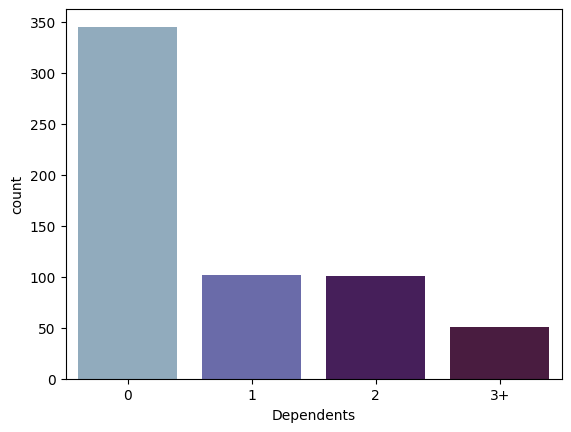

In [24]:
# Visualising the frequency of Dependents in the dataset
sns.countplot(x=df.Dependents)
plt.show()

There are many more applicants with no Dependents than with Dependents.

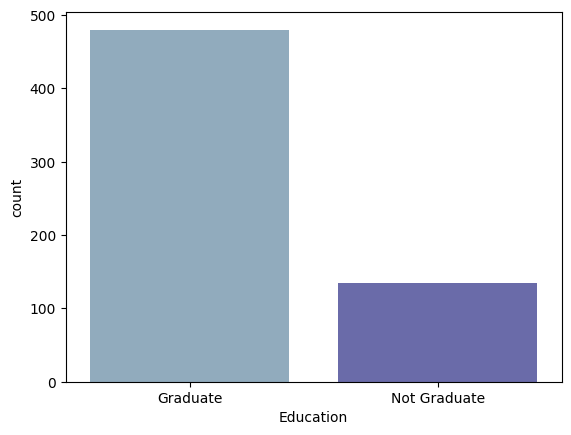

In [25]:
# Visualising the frequency of Education in the dataset
sns.countplot(x=df.Education)
plt.show()

There are more Graduates applicants than Non Graduates.

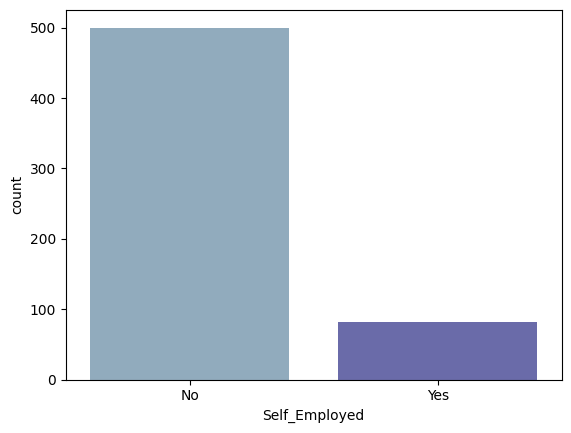

In [26]:
# Visualising the frequency of Self_Employed in the dataset
sns.countplot(x=df.Self_Employed)
plt.show()

There are way less Self-employed applicants in the dataset.

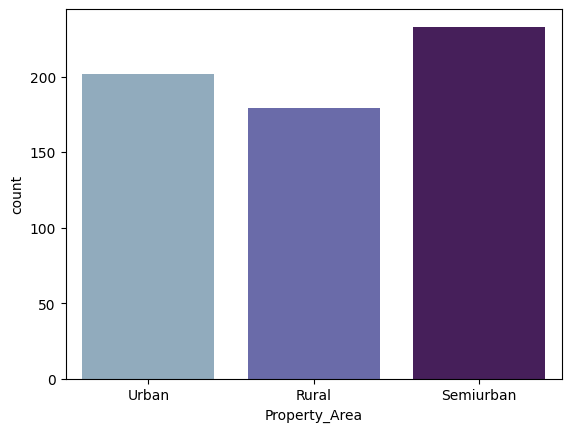

In [27]:
# Visualising the frequency of Property_Area in the dataset
sns.countplot(x=df.Property_Area)
plt.show()

Most of the applicants are from Semiurban areas.

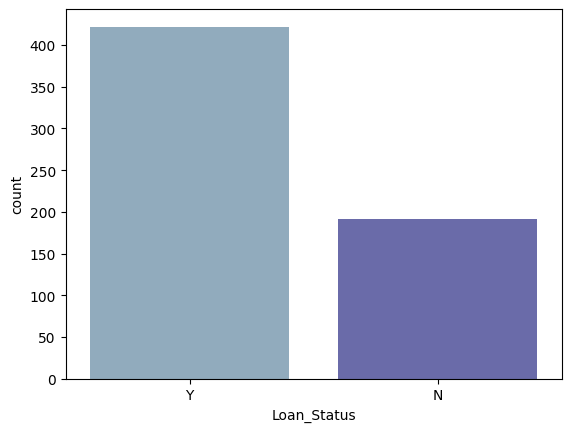

In [28]:
# Visualising the frequency of Loan_Status in the dataset
sns.countplot(x=df.Loan_Status)
plt.show()

Most of the applicants have been granted loans.

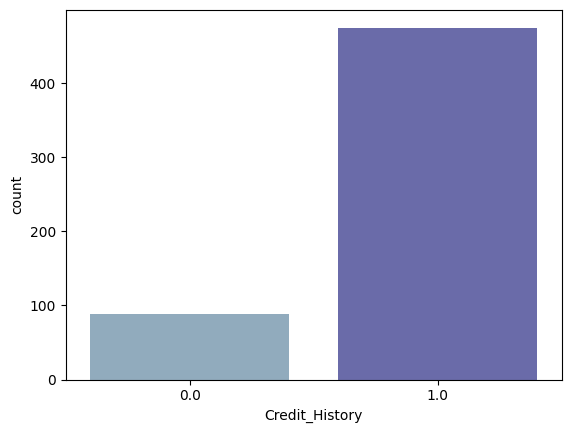

In [29]:
# Visualising the frequency of Credit_History in the dataset
sns.countplot(x=df.Credit_History)
plt.show()

Most of the applicants have Credit_History.

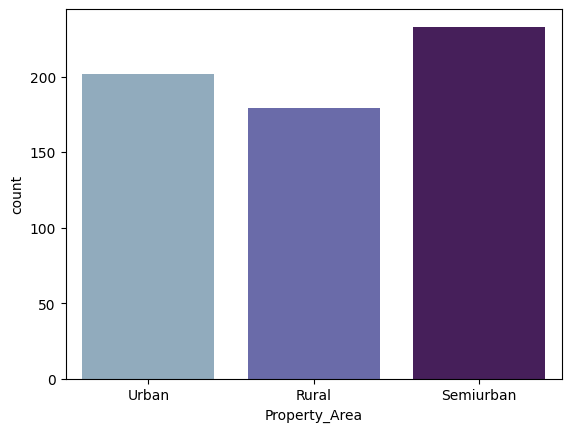

In [30]:
# Visualising the frequency of Property_Area in the dataset
sns.countplot(x=df.Property_Area)
plt.show()

Most of the applicants are from Semiurban areas.

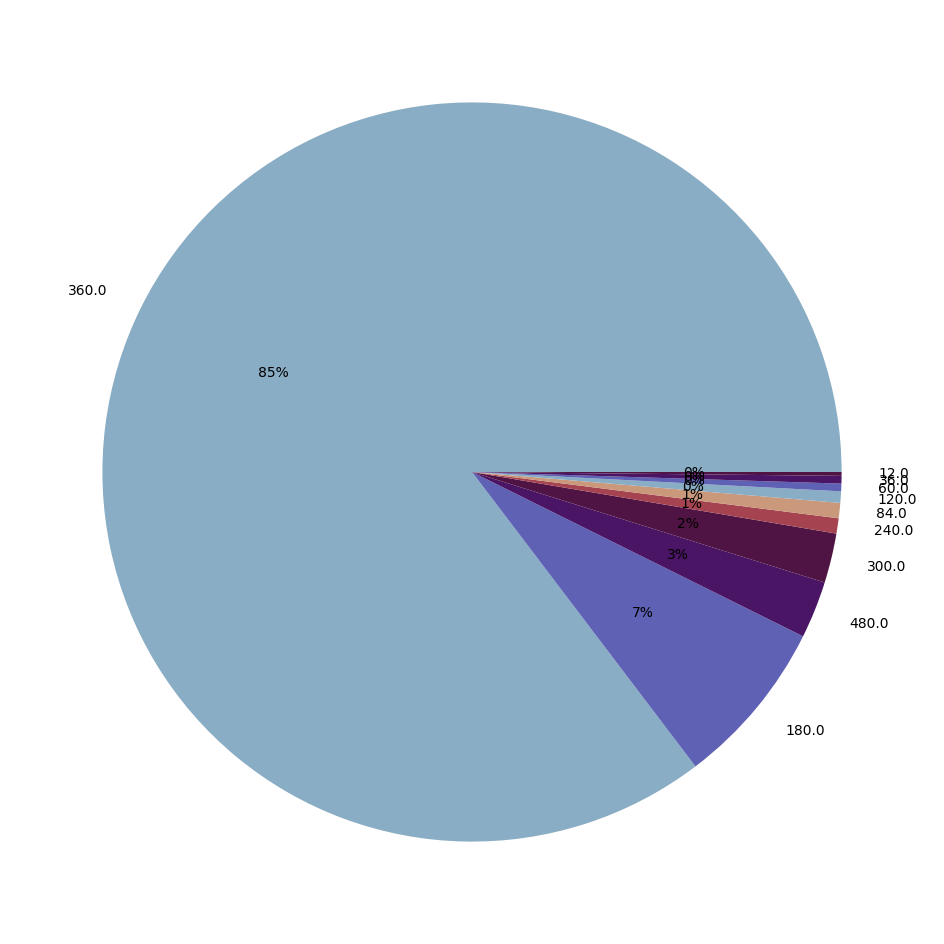

In [31]:
# Visualising the Loan_Amount_Term in a pie-chart

plt.figure(figsize=(12, 12))
palette_color = sns.color_palette('twilight')
  
plt.pie(df.Loan_Amount_Term.value_counts(), labels=df.Loan_Amount_Term.value_counts().index, colors=palette_color, autopct='%.0f%%')
plt.show()

Majority of the applicants have a Loan_Amount_Term of 360.

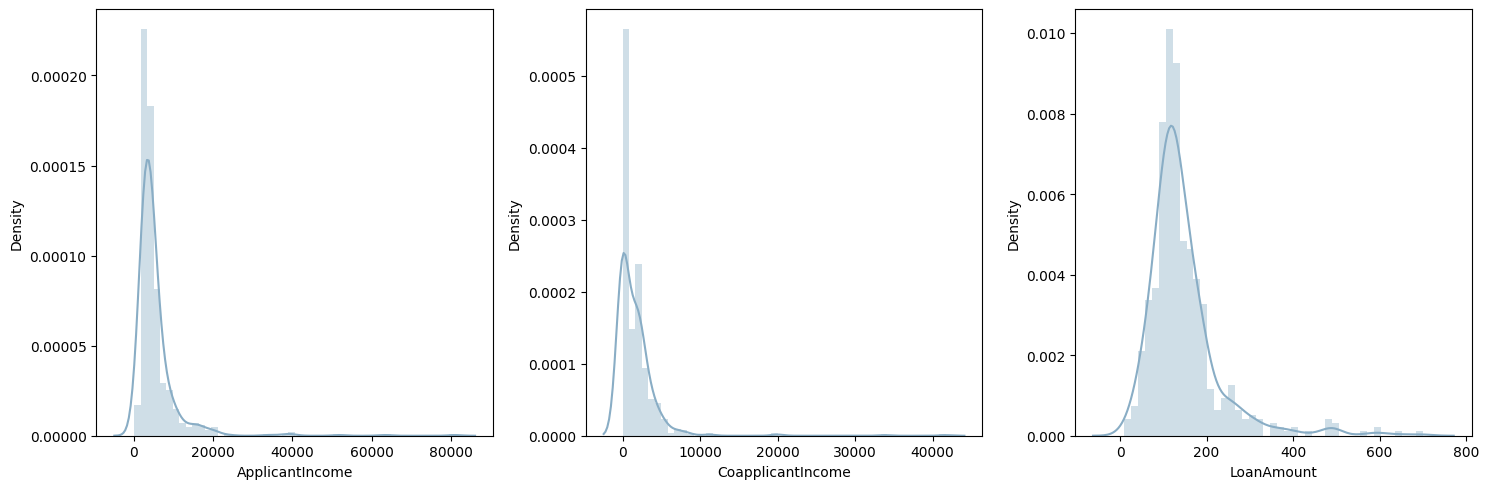

In [32]:
# Data distribution for numerical columns
plt.figure(figsize=(15, 5))
plot_num = 1
for col in num_cols:
    if plot_num <= 3:
        ax = plt.subplot(1, 3, plot_num)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

From above we can observe that ApplicantIncome, CoapplicantIncome and LoanAmount are all alittle skewed to the right.

##### Bivariate analysis

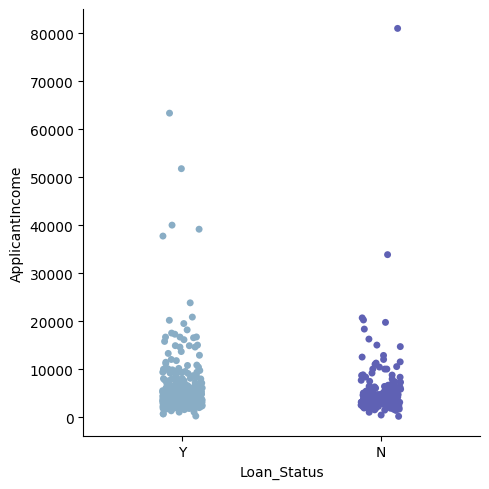

In [33]:
# Comparison between ApplicantIncome and Loan_Status
sns.catplot(x='Loan_Status', y='ApplicantIncome', hue='Loan_Status', data=df)
plt.show()

In general, Applicants with Loan Status as Y tend to have higher income.

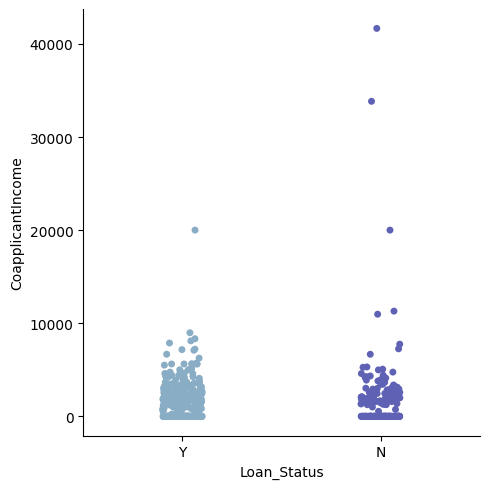

In [34]:
# Comparison between CoapplicantIncome and Loan_Status
sns.catplot(x='Loan_Status', y='CoapplicantIncome', hue='Loan_Status', data=df)
plt.show()

The Coapplicant Income does not significantly affect the Loan Status. It seems that very high Coapplicant Income does not result in Loan Apllication getting granted.

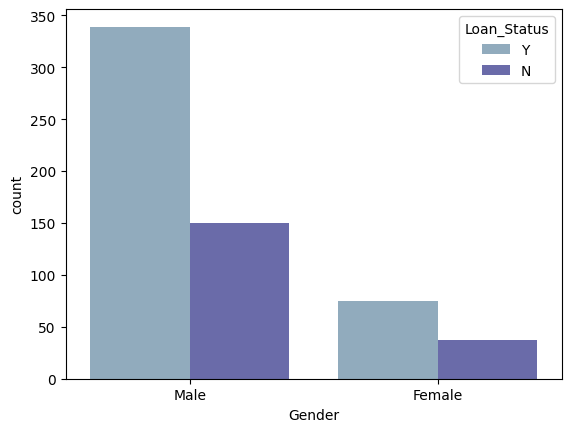

In [35]:
# Comparison between Gender and Loan_Status
sns.countplot(x='Gender', hue='Loan_Status', data=df)
plt.show()

Male applicants seem to have more loan applications granted than Female applicants.

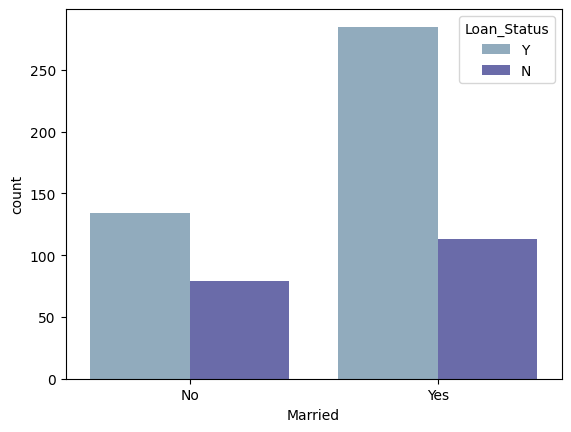

In [36]:
# Comparison between Married and Loan_Status
sns.countplot(x='Married', hue='Loan_Status', data=df)
plt.show()

Married applicants seem to have more loan applications granted than unmarried applicants.

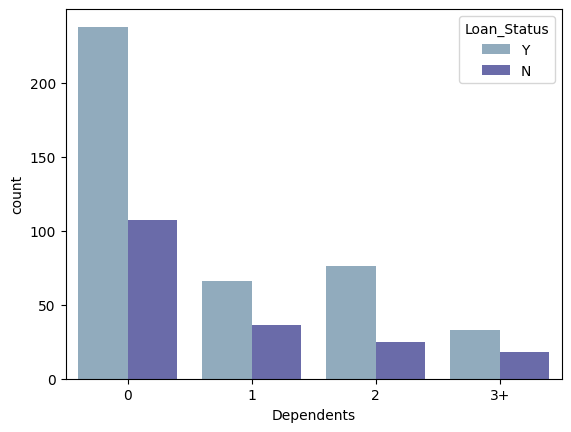

In [37]:
# Comparison between Dependents and Loan_Status
sns.countplot(x='Dependents', hue='Loan_Status', data=df)
plt.show()

Applicants with no dependents have more loans granted than applicants with dependents.

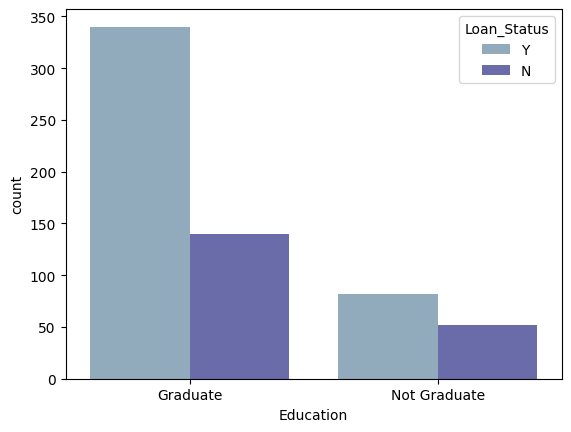

In [38]:
# Comparison between Education and Loan_Status
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.show()

Graduate applicants seem to have more loan applications granted than Non Graduates.

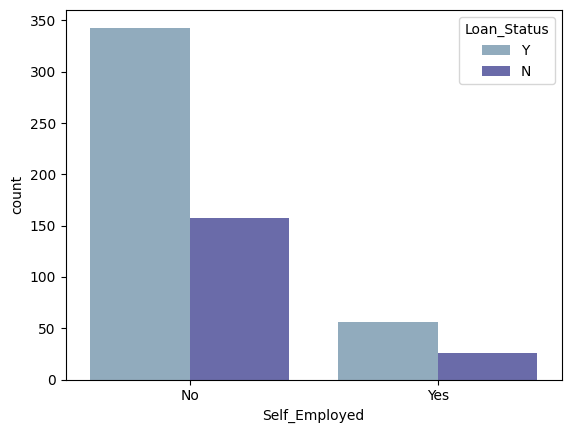

In [39]:
# Comparison between Self_Employed and Loan_Status
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)
plt.show()

Self-employed applicants have a lower chance of getting loans granted than others.

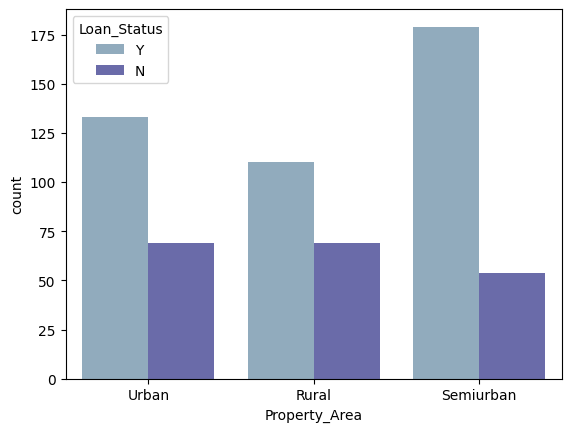

In [40]:
# Comparison between Property_Area and Loan_Status
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.show()

Applicants from Semiurban areas seem to have more Loan Applications granted than applicants from Urban or Rural areas.

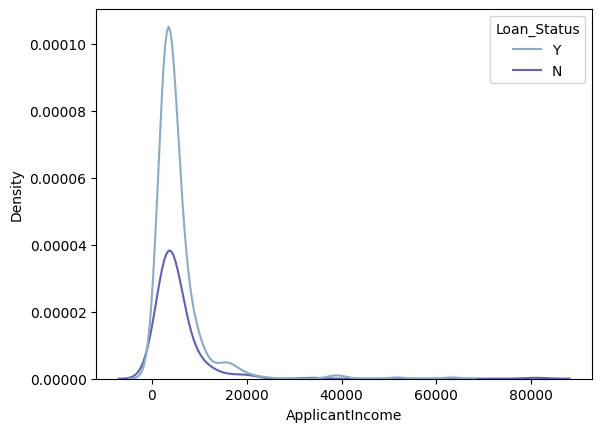

In [41]:
# ApplicantIncome vs Loan_Status
sns.kdeplot(x="ApplicantIncome", data=df, hue="Loan_Status")
plt.show()

The mean Applicant income is almost the same for both Loan_Status Y as well as Loan_Status N.

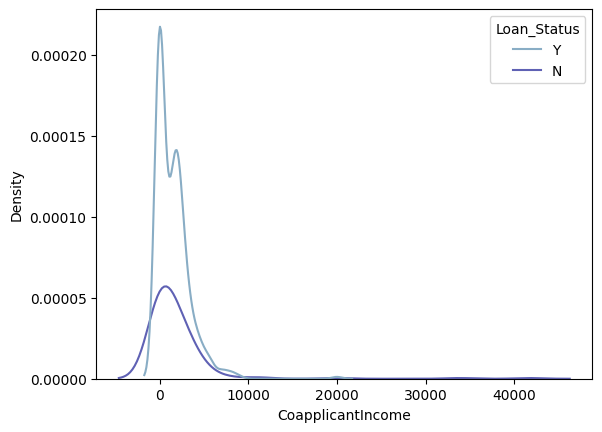

In [42]:
# CoapplicantIncome vs Loan_Status
sns.kdeplot(x="CoapplicantIncome", data=df, hue="Loan_Status")
plt.show()

The average Coapplicant income seems to be slightly higher for Aplications that are not granted a loan.

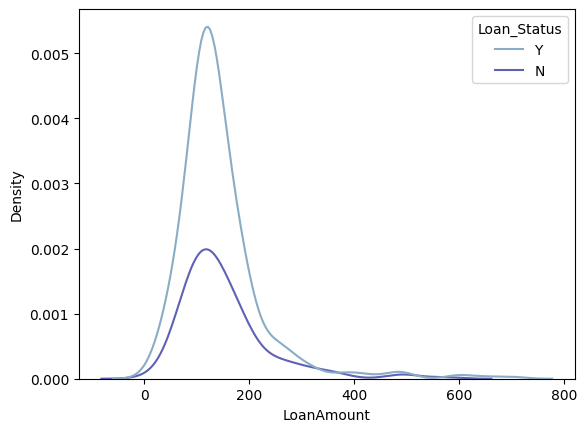

In [43]:
# LoanAmount vs Loan_Status
sns.kdeplot(x="LoanAmount", data=df, hue="Loan_Status")
plt.show()

The mean Loan amount is slightly higher for applicants with loans not granted than for applicants with loans granted.

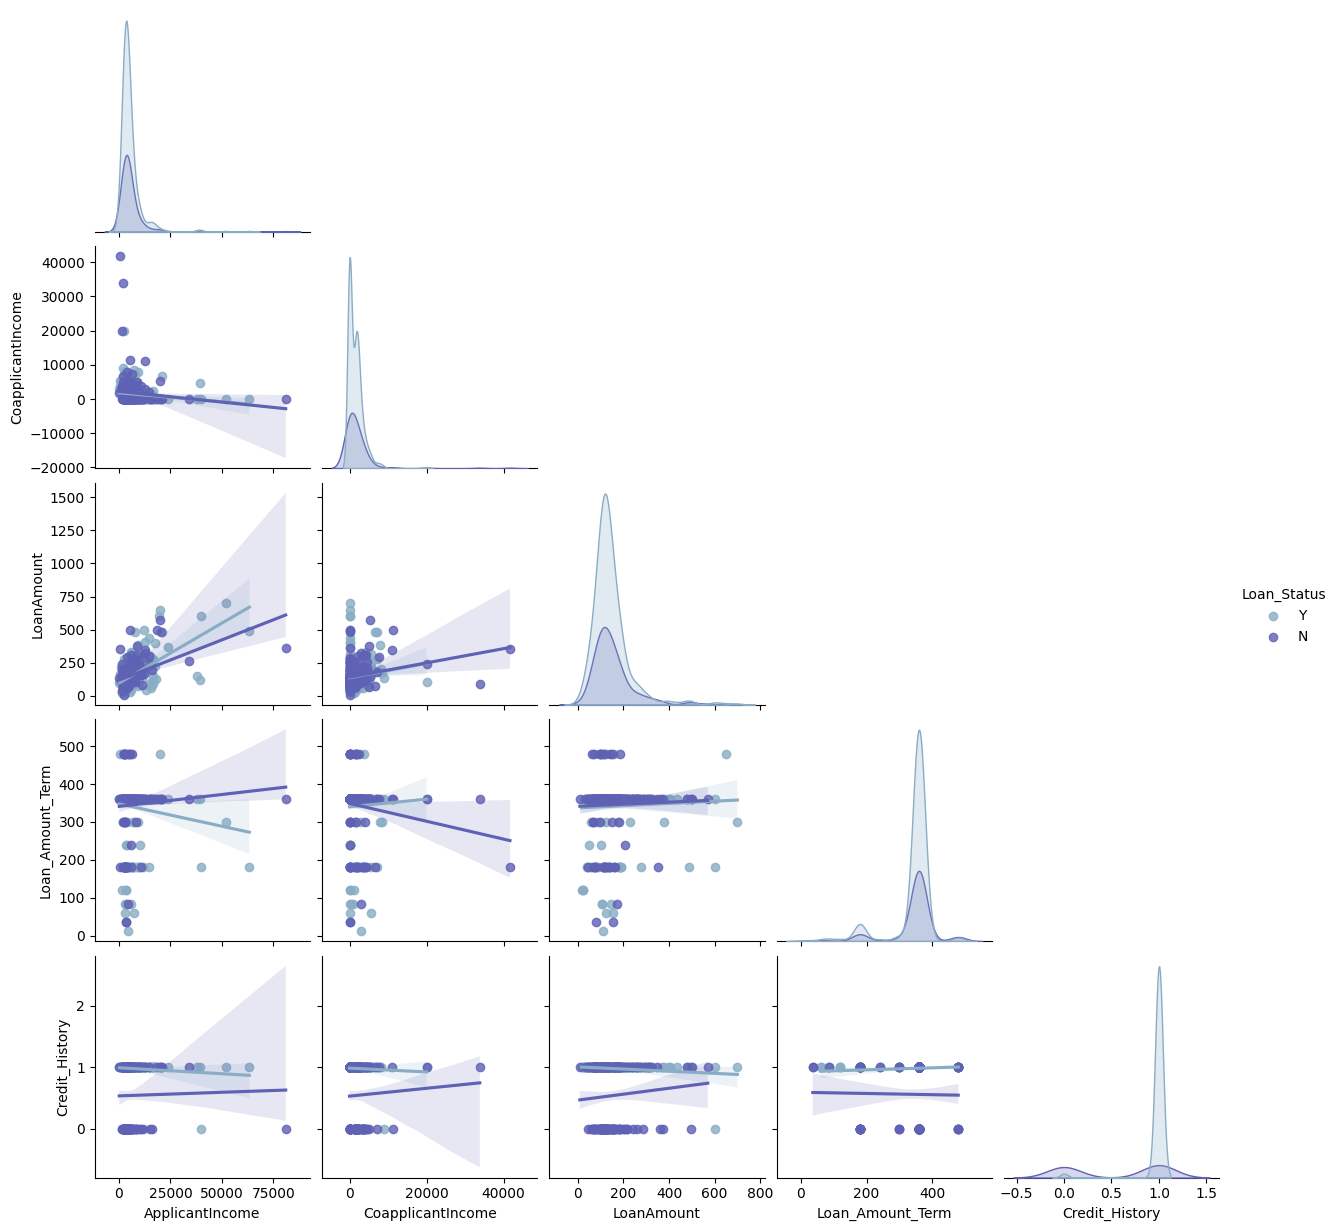

In [44]:
# Pairwise relation between variables with respect to the Survived
sns.pairplot(df, hue='Loan_Status', corner=True, kind='reg')
plt.show()

The observations from the pairplot are:
- The ApplicantIncome and LoanAmount seems to have a positive linear relationship with each other.
- CoaplicantIncome and Loan_Amount_Term seems to have a negative linear relationship with each other.

### Data Preprocessing

Before proceeding to check for outliers and skewness, the missing data need to be filled.

In [45]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

For categorical variables, the missing values should be filled with the most frequently occuring value. For the numerical variables, we need to impute missing values with the median since all the continuous numerical variables have high skewness.

In [46]:
cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']
for col in cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [47]:
df['LoanAmount'] = df['LoanAmount'].fillna(df[col].median())

Now, we need to remove the Loan_ID column as it does not have any quantifiable value.

In [48]:
df.drop(columns='Loan_ID', inplace=True)

In [49]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

There are no more missing values in the dataset.

### Encoding categorical variables

In [50]:
# Using LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [51]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i].values.reshape(-1, 1))

In [52]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,1.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


The categorical variables have been encoded now. Loan_Status Y = 1 and N = 0.

### Checking for outliers

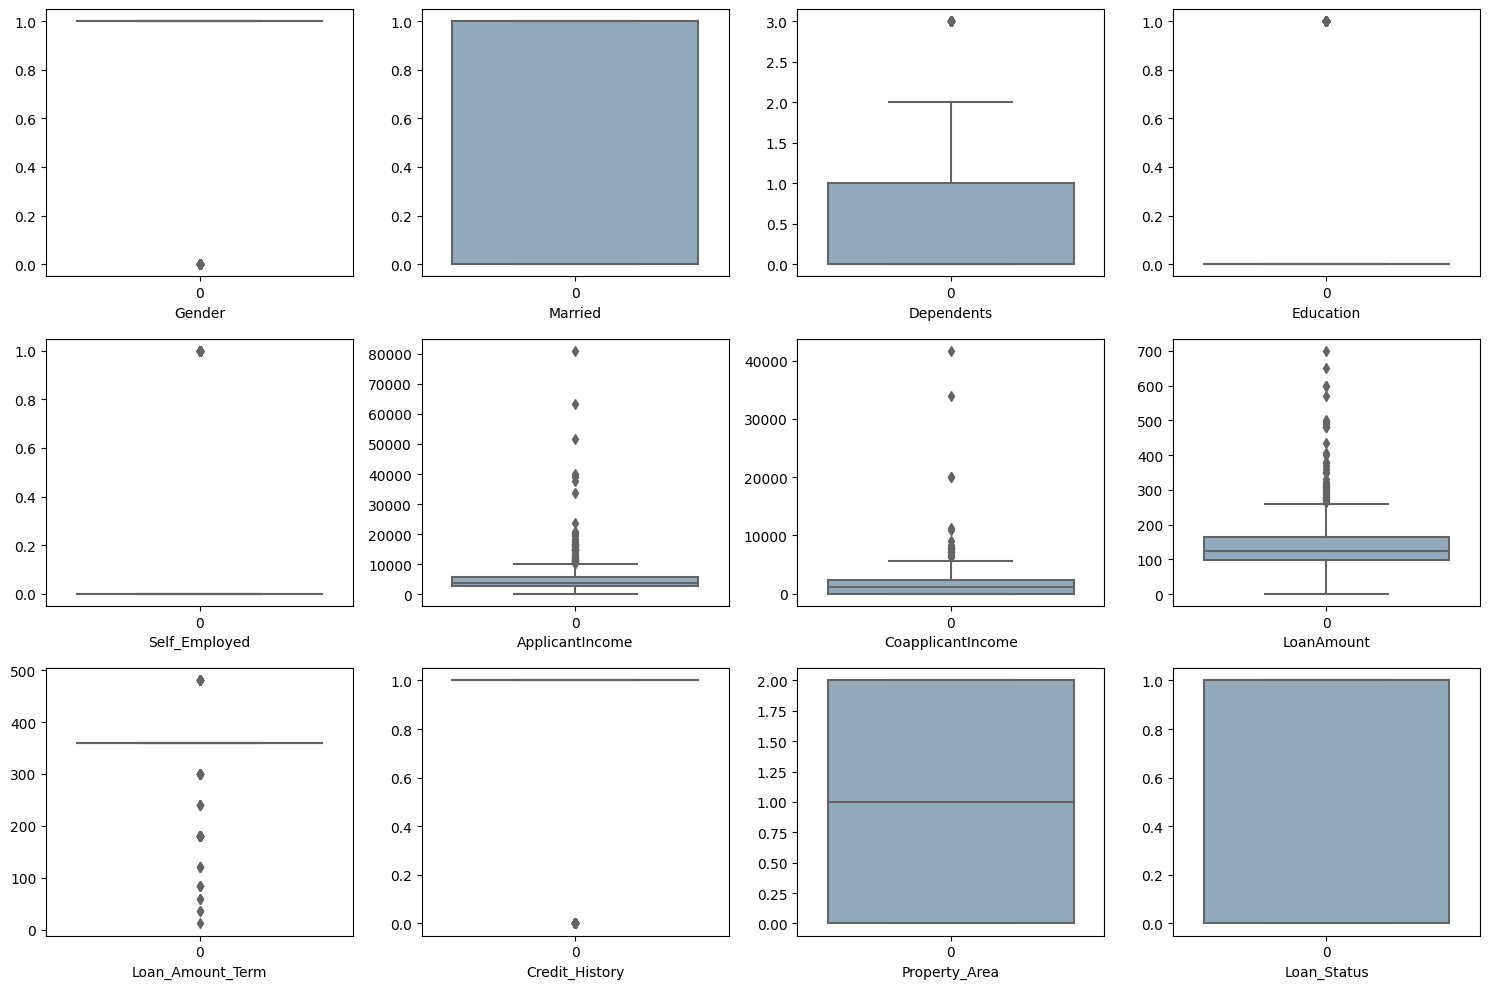

In [53]:
# Checking for outliers using boxplot
plt.figure(figsize=(15, 10))
plot_num = 1
for col in df.columns.to_list():
    if plot_num <= 12:
        ax = plt.subplot(3, 4, plot_num)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

Most of the columns above have outliers present which need to be removed.

#### Z-score method

In [54]:
from scipy.stats import zscore

In [55]:
out_features = df[['Gender', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
z = np.abs(zscore(out_features))
z

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.472343,0.737806,0.528362,0.392601,0.072991,0.554487,1.589383,0.273231,0.411733
1,0.472343,0.253470,0.528362,0.392601,0.134412,0.038732,0.149662,0.273231,0.411733
2,0.472343,0.737806,0.528362,2.547117,0.393747,0.554487,0.852518,0.273231,0.411733
3,0.472343,0.737806,1.892641,0.392601,0.462062,0.251980,0.240354,0.273231,0.411733
4,0.472343,0.737806,0.528362,0.392601,0.097728,0.554487,0.002289,0.273231,0.411733
...,...,...,...,...,...,...,...,...,...
609,2.117107,0.737806,0.528362,0.392601,0.410130,0.554487,0.795836,0.273231,0.411733
610,0.472343,2.236021,0.528362,0.392601,0.212557,0.554487,1.147264,2.522836,0.411733
611,0.472343,0.253470,0.528362,0.392601,0.437174,0.472404,1.267386,0.273231,0.411733
612,0.472343,1.244745,0.528362,0.392601,0.357064,0.554487,0.519184,0.273231,0.411733


In [56]:
# Removing data where z-score is above 3 (threshold value) for normal distribution
df_z = df[(z<3).all(axis=1)]
df_z.shape

(579, 12)

In [57]:
# Data loss percentage
old = df.shape[0]
new_z = df_z.shape[0]

(old - new_z)/old * 100

5.700325732899023

Data loss percentage is around 5.7% for Z-score method.

#### IQR method

In [58]:
q1 = out_features.quantile(0.25)
q3 = out_features.quantile(0.75)

iqr = q3 - q1

df_q = df[~((df < (q1 - 1.5*iqr))| (df > (q3 + 1.5*iqr))).any(axis=1)]

df_q.shape

(207, 12)

In [59]:
# Data loss percentage
old = df.shape[0]
new_q = df_q.shape[0]

(old - new_q)/old * 100

66.28664495114006

Data loss percentage is around 66.29%, which is higher than the acceptable value. Normally, we consider data loss of less than 10% only.<br>

So, we will use the z-score method to remove outliers.

In [60]:
df = df_z

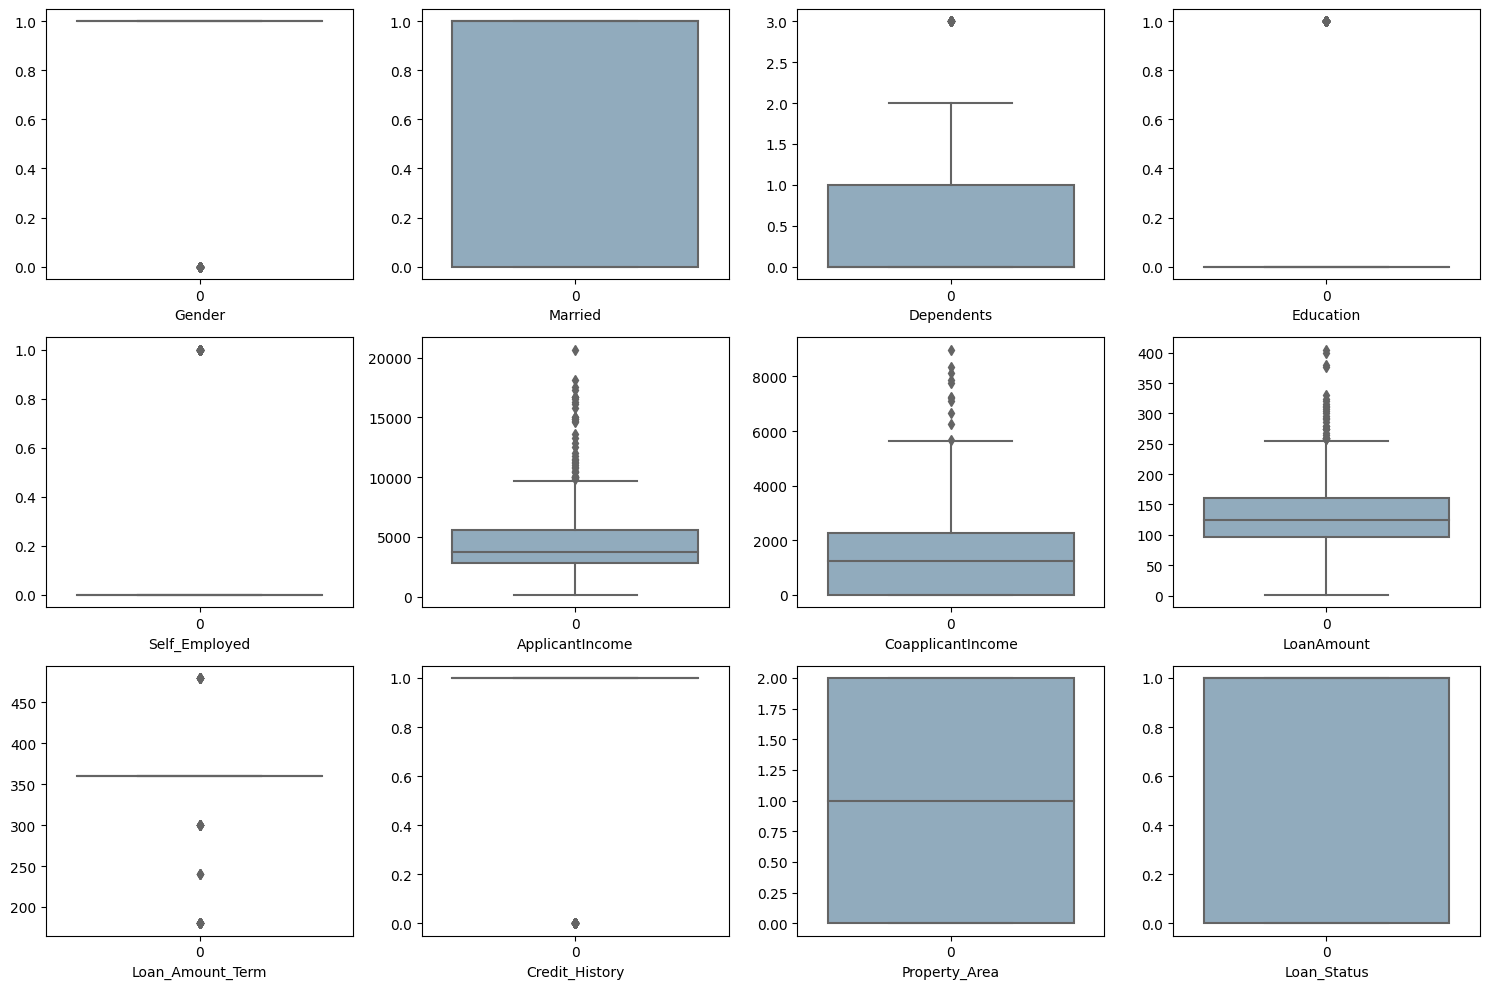

In [61]:
# Checking for outliers again using boxplot
plt.figure(figsize=(15, 10))
plot_num = 1
for col in df.columns.to_list():
    if plot_num <= 12:
        ax = plt.subplot(3, 4, plot_num)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

Some of the outliers have been removed.

### Checking for skewness

In [62]:
df.skew()

Gender              -1.628386
Married             -0.627815
Dependents           1.048079
Education            1.311934
Self_Employed        2.235338
ApplicantIncome      2.143550
CoapplicantIncome    1.354399
LoanAmount           0.868602
Loan_Amount_Term    -2.104201
Credit_History      -1.981751
Property_Area       -0.052053
Loan_Status         -0.828063
dtype: float64

The acceptable skewness range is between -0.5 to 0.5 (for extremely normal distributions) and between -1 to 1 for moderately normal distribution<br>
This means that all columns have high skewness that needs to be removed.

In [63]:
#Importing extra libraries to remove skewness
from scipy import stats
from scipy import special

In [64]:
# Removing skewness
columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

skew_transform = {}

for col in columns:
    transformed_log = np.log(df[col])                        # Log Transformation
    transformed_boxcox = special.boxcox1p(df[col], 0.15)     # Box-Cox Transformation with lambda=0.15
    transformed_inverse = 1 / df[col]                        # Inverse Transformation
    transformed_yeojohnson, _ = stats.yeojohnson(df[col])    # Yeo-Johnson Transformation
    transformed_cbrt = np.cbrt(df[col])                      # Cube Root Transformation
    transformed_sqrt = np.sqrt(df[col])                      # Square Root Transformation

    # Creating a dictionary for the skewness values of each transformation
    transformed_skew = {
        "Log Transformation": stats.skew(transformed_log),
        "Box-Cox Transformation": stats.skew(transformed_boxcox),
        "Inverse Transformation": stats.skew(transformed_inverse),
        "Yeo Johnson Transformation": stats.skew(transformed_yeojohnson),
        "Cube Root Transformation": stats.skew(transformed_cbrt),
        "Square Root Transformation": stats.skew(transformed_sqrt)}

    # Storing the transformation skewness values for the column
    skew_transform[col] = transformed_skew

In [65]:
skew_transform_df = pd.DataFrame.from_dict(skew_transform)
skew_transform_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Log Transformation,NaN,NaN,NaN,NaN,NaN,-0.178525,NaN,-3.536109,-2.737819,NaN
Box-Cox Transformation,-1.624164,-0.626187,0.748622,1.308533,2.229542,0.374952,-0.149293,-2.488919,-2.666816,-1.976613
Inverse Transformation,NaN,NaN,NaN,NaN,NaN,13.294913,NaN,4.825315,3.045147,NaN
Yeo Johnson Transformation,-1.624164,-0.626187,0.475777,1.308533,2.229542,0.024165,-0.184773,0.097650,0.729330,-1.976613
Cube Root Transformation,-1.624164,-0.626187,0.496286,1.308533,2.229542,0.862105,-0.031862,-1.697960,-2.572012,-1.976613
Square Root Transformation,-1.624164,-0.626187,0.606441,1.308533,2.229542,1.219557,0.213118,-0.834623,-2.472925,-1.976613


The Yeo Johnson transformation is the most suitable transformation for all this data.

In [66]:
# Transforming using YeoJohnson
for col in columns:
    transformed_col, _ = stats.yeojohnson(df[col])
    df[col] = transformed_col

In [67]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,25.293046,0.00000,-0.000000,-0.000000,-0.000000,10.787747,0.000000,0.900759,1.702028e+07,82.231882,2,1
1,25.293046,2.07118,0.438976,-0.000000,-0.000000,10.418280,9.726337,45.477748,1.702028e+07,82.231882,0,0
2,25.293046,2.07118,-0.000000,-0.000000,0.088837,9.786792,0.000000,27.750271,1.702028e+07,82.231882,2,1
3,25.293046,2.07118,-0.000000,0.165548,-0.000000,9.566864,10.509082,43.350842,1.702028e+07,82.231882,2,1
4,25.293046,0.00000,-0.000000,-0.000000,-0.000000,10.826610,0.000000,48.858571,1.702028e+07,82.231882,2,1


These are the transformed values. We can check the skewness again now.

In [68]:
df.skew()

Gender              -1.628386
Married             -0.627815
Dependents           0.477013
Education            1.311934
Self_Employed        2.235338
ApplicantIncome      0.024228
CoapplicantIncome   -0.185253
LoanAmount           0.097903
Loan_Amount_Term     0.731226
Credit_History      -1.981751
Property_Area       -0.052053
Loan_Status         -0.828063
dtype: float64

The skewness values are all within range now.

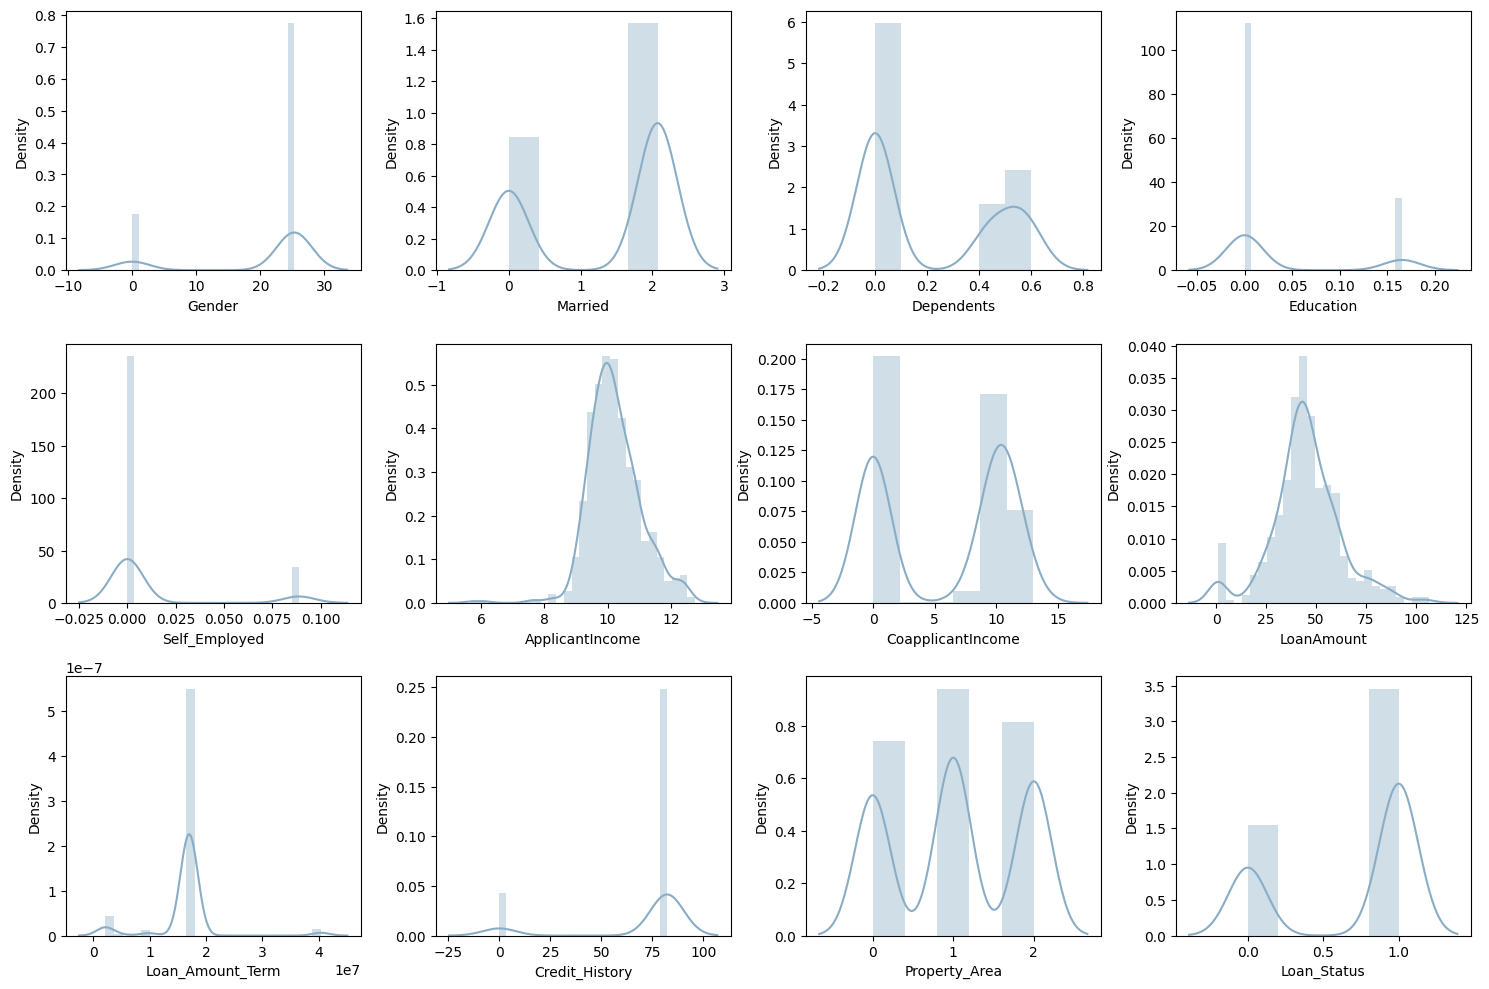

In [69]:
# Data distribution
plt.figure(figsize=(15, 10))
plot_num = 1
for col in df.columns.to_list():
    if plot_num <= 12:
        ax = plt.subplot(3, 4, plot_num)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

The distribution for all variables look more normalised now.

### Correlation analysis

In [70]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.377547,0.183469,0.044763,-0.004327,0.062206,0.232130,0.130157,-0.098099,0.013852,-0.027398,0.018492
Married,0.377547,1.000000,0.351763,0.025340,-0.011440,-0.026254,0.335752,0.132609,-0.128263,0.018809,0.008992,0.088047
Dependents,0.183469,0.351763,1.000000,0.059086,0.075651,0.110200,0.022593,0.117974,-0.094821,-0.015504,0.037549,0.019087
Education,0.044763,0.025340,0.059086,1.000000,-0.009182,-0.178521,0.051892,-0.147111,-0.062669,-0.075939,-0.067203,-0.093793
Self_Employed,-0.004327,-0.011440,0.075651,-0.009182,1.000000,0.219031,-0.091024,0.110201,-0.051229,-0.014672,-0.033911,-0.023759
ApplicantIncome,0.062206,-0.026254,0.110200,-0.178521,0.219031,1.000000,-0.365806,0.386974,-0.087508,0.031849,-0.017426,0.003269
CoapplicantIncome,0.232130,0.335752,0.022593,0.051892,-0.091024,-0.365806,1.000000,0.162324,-0.000652,0.004984,-0.071526,0.076597
LoanAmount,0.130157,0.132609,0.117974,-0.147111,0.110201,0.386974,0.162324,1.000000,0.034963,0.018466,-0.104940,0.025861
Loan_Amount_Term,-0.098099,-0.128263,-0.094821,-0.062669,-0.051229,-0.087508,-0.000652,0.034963,1.000000,0.000011,-0.030156,-0.056301
Credit_History,0.013852,0.018809,-0.015504,-0.075939,-0.014672,0.031849,0.004984,0.018466,0.000011,1.000000,-0.009078,0.561299


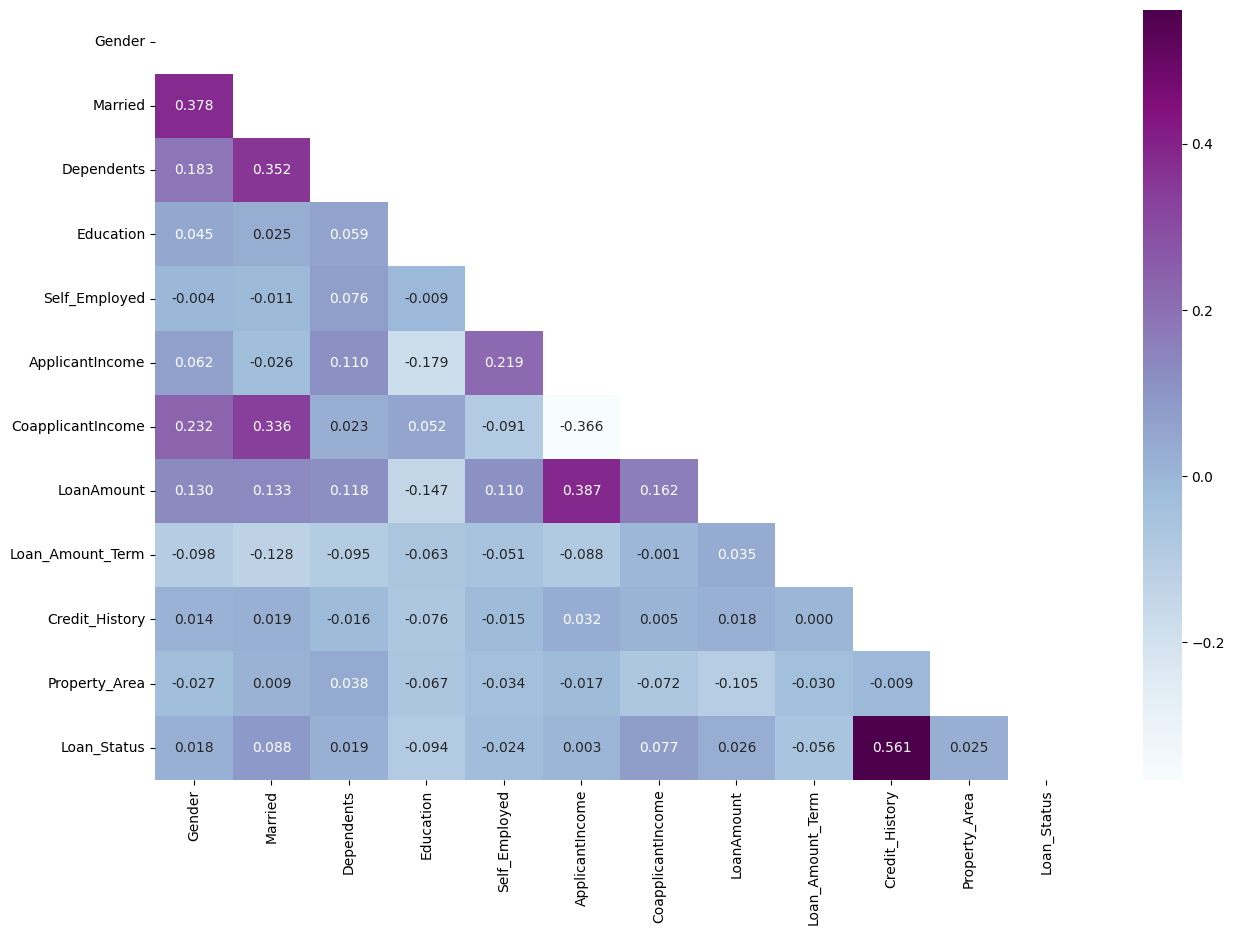

In [71]:
# Heatmap for correlation analysis
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15, 10))
palette = sns.color_palette("BuPu", as_cmap=True)
sns.heatmap(df.corr(), annot=True, fmt='.3f', cmap=palette, mask=mask)
plt.show()

All the relationships are very weak.<br>
The strongest relationship is between Credit_History and Loan_Status. This means applicants with credit history have a higher probability of getting loan granted.<br>
There is also a moderate correlation between ApplicantIncome and LoanAmount, Gender and Married, Married and Dependents, Married and CoapplicantIncome.

In [72]:
df.corr()['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.561299
Married              0.088047
CoapplicantIncome    0.076597
LoanAmount           0.025861
Property_Area        0.024892
Dependents           0.019087
Gender               0.018492
ApplicantIncome      0.003269
Self_Employed       -0.023759
Loan_Amount_Term    -0.056301
Education           -0.093793
Name: Loan_Status, dtype: float64

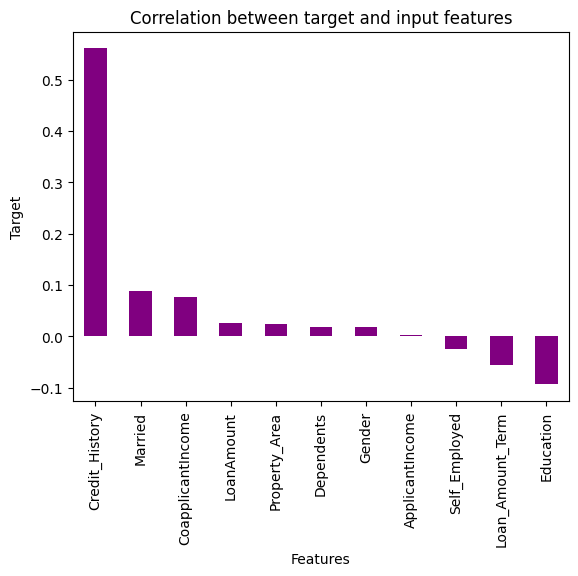

In [73]:
# Visualising the correlation between target and input features
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar', color='purple')
plt.title('Correlation between target and input features')
plt.xlabel('Features')
plt.ylabel('Target')
plt.show()

The target variable Loan_Status has the strongest relationship with Credit_History which is around 0.561

### Separating features and target

In [74]:
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

#### Feature scaling

In [75]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.476125,-1.360962,-0.809791,-0.540750,-0.382798,0.668532,-1.118286,-2.596078,0.13043,0.417663,1.230110
1,0.476125,0.734775,0.900806,-0.540750,-0.382798,0.226356,0.749081,0.020297,0.13043,0.417663,-1.304529
2,0.476125,0.734775,-0.809791,-0.540750,2.612341,-0.529405,-1.118286,-1.020189,0.13043,0.417663,1.230110
3,0.476125,0.734775,-0.809791,1.849283,-0.382798,-0.792614,0.899361,-0.104538,0.13043,0.417663,1.230110
4,0.476125,-1.360962,-0.809791,-0.540750,-0.382798,0.715043,-1.118286,0.218729,0.13043,0.417663,1.230110


### Checking Variance Inflation Factor

In [76]:
# Checking for multicollinearity using Variance Inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_values = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif = pd.DataFrame({'Features': x.columns, 'VIF': vif_values})
vif

,Features,VIF
0,Gender,1.216885
1,Married,1.430540
2,Dependents,1.188279
3,Education,1.070240
4,Self_Employed,1.059216
5,ApplicantIncome,1.630730
6,CoapplicantIncome,1.522141
7,LoanAmount,1.387645
8,Loan_Amount_Term,1.046575
9,Credit_History,1.007798


There is no multicollinearity in the dataset.

### Model building

In [77]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### Splitting data into train and test

In [78]:
# Finding the best random state for splitting the data
max_accu = 0
max_rs = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                        test_size=0.3,
                                                        random_state=i,
                                                        stratify=y
                                                       )
    # The split should be stratified so that y samples for both classes are equally represented in training and test data
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    accu = accuracy_score(y_test, y_pred)
    if accu > max_accu:
        max_accu = accu
        max_rs = i
        
print(f'Best accuracy: {max_accu}\nRandom state for best accuracy: {max_rs}')

Best accuracy: 0.867816091954023
Random state for best accuracy: 104


In [79]:
# Splitting into train-test data using best random state
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3,
                                                    random_state=max_rs,
                                                    stratify=y
                                                   )

In [80]:
y_train.value_counts()

1    280
0    125
Name: Loan_Status, dtype: int64

There are more applicants with loans granted than with not. The class imbalance needs to be handled using Oversampling.

#### Oversampling using SMOTE

In [81]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42) # choosing random state for reproducible results
x1, y1 = sm.fit_resample(x_train, y_train)

In [82]:
y1.value_counts()

0    280
1    280
Name: Loan_Status, dtype: int64

The imbalance has now been resolved by oversampling.

#### Classification models

In [83]:
# Importing several Classification models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import catboost
import xgboost

# Importing model evaluation metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [84]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Classifier', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Extra Trees', ExtraTreesClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('XGBoost', xgboost.XGBClassifier()),
    ('CatBoost', catboost.CatBoostClassifier(verbose=0))
]

accuracies = []
confusion_matrices = []
classification_reports = []

for model_name, model in models:
    
    model.fit(x1, y1)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    accuracies.append((model_name, accuracy))
    confusion_matrices.append((model_name, cm))
    classification_reports.append((model_name, cr))

df_results = pd.DataFrame(accuracies, columns=['Model', 'Accuracy'])
df_results.sort_values('Accuracy', ascending=False, inplace=True)

df_results

,Model,Accuracy
5,Gaussian Naive Bayes,0.867816
1,Support Vector Classifier,0.816092
6,Extra Trees,0.816092
4,Random Forest,0.804598
0,Logistic Regression,0.798851
10,CatBoost,0.793103
9,XGBoost,0.775862
8,Gradient Boosting,0.764368
7,AdaBoost,0.758621
3,Decision Tree,0.718391


Based on the above results, Gaussian Naive Bayes model performs the best on the test data.

#### Confusion matrices

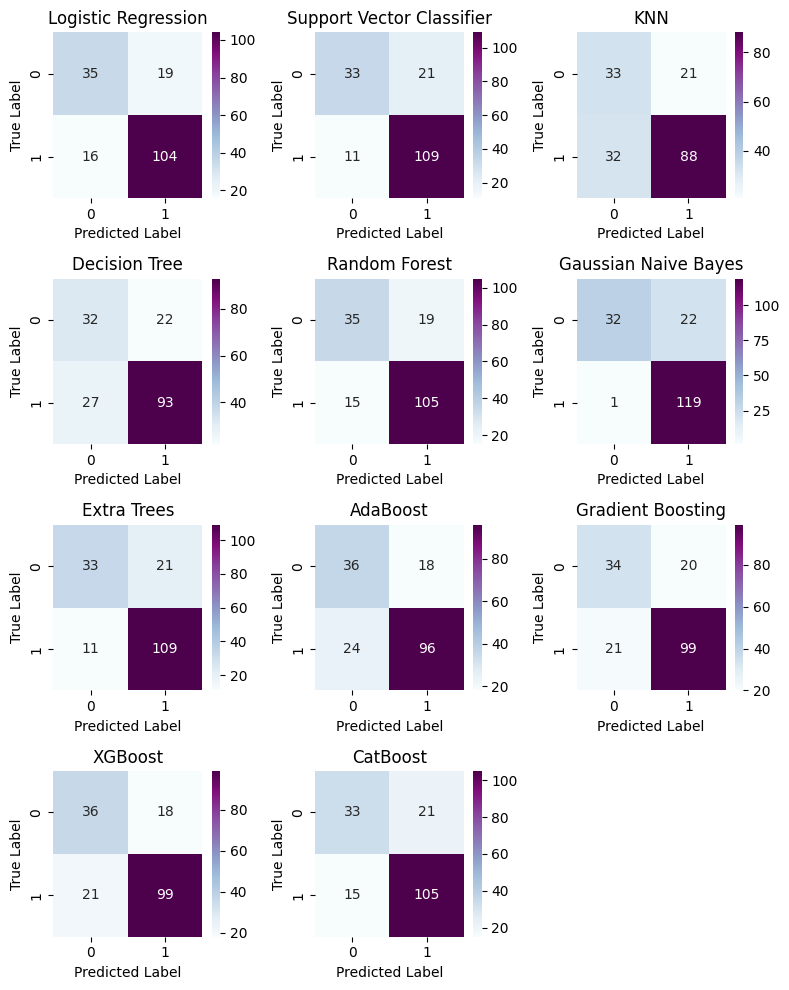

In [85]:
plt.figure(figsize=(8, 10))
for i, (model_name, cm) in enumerate(confusion_matrices, 1):
    plt.subplot(4, 3, i)
    plt.title(model_name)
    sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plt.tight_layout()
plt.show()

#### Classification Reports

In [86]:
for model_name, cr in classification_reports:
    print(model_name)
    print(cr)
    print('-'*60)

Logistic Regression
              precision    recall  f1-score   support

           0       0.69      0.65      0.67        54
           1       0.85      0.87      0.86       120

    accuracy                           0.80       174
   macro avg       0.77      0.76      0.76       174
weighted avg       0.80      0.80      0.80       174

------------------------------------------------------------
Support Vector Classifier
              precision    recall  f1-score   support

           0       0.75      0.61      0.67        54
           1       0.84      0.91      0.87       120

    accuracy                           0.82       174
   macro avg       0.79      0.76      0.77       174
weighted avg       0.81      0.82      0.81       174

------------------------------------------------------------
KNN
              precision    recall  f1-score   support

           0       0.51      0.61      0.55        54
           1       0.81      0.73      0.77       120

    accura

The Gaussian Naive Bayes Classifier seems to have good precision and recall values too.

#### Using Cross Validation

In [87]:
from sklearn.model_selection import cross_val_score

In [88]:
accuracies = []

for model_name, model in models:
    cv_score = cross_val_score(model, x_train, y_train, cv=5) # Using fold value of 5
    mean_accuracy = cv_score.mean()
    
    model.fit(x1, y1)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    diff = abs(accuracy - mean_accuracy)
    
    accuracies.append((model_name, mean_accuracy, accuracy, diff))

df_results = pd.DataFrame(accuracies, columns=['Model', 'CV Accuracy', 'Accuracy', 'Difference'])
df_results.sort_values('Difference', ascending=True, inplace=True)

df_results

,Model,CV Accuracy,Accuracy,Difference
7,AdaBoost,0.762963,0.758621,0.004342
0,Logistic Regression,0.792593,0.798851,0.006258
10,CatBoost,0.782716,0.793103,0.010387
8,Gradient Boosting,0.750617,0.764368,0.013751
1,Support Vector Classifier,0.795062,0.816092,0.021030
4,Random Forest,0.767901,0.793103,0.025202
9,XGBoost,0.735802,0.775862,0.040060
2,KNN,0.743210,0.695402,0.047808
6,Extra Trees,0.753086,0.810345,0.057258
5,Gaussian Naive Bayes,0.782716,0.867816,0.085100


As we can observe, AdaBoost model is the least overfitting model as the difference between Cross validation accuracy and Test accuracy is the least. The other models also seem to have very less difference between CV Accuracy and test Accuracy.

#### Hyperparameter Tuning

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

##### Logistic Regression

In [90]:
params = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga', 'newton-cholesky'],
    'fit_intercept': [True, False],
    'max_iter': [1, 2, 5, 7, 10, 50, 100]
    }

In [91]:
gcv = GridSearchCV(LogisticRegression(), params, cv=5, scoring='accuracy')
gcv.fit(x1, y1)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'fit_intercept': [True, False],
                         'max_iter': [1, 2, 5, 7, 10, 50, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga', 'newton-cholesky']},
             scoring='accuracy')

In [92]:
best_params = gcv.best_params_
best_params

{'fit_intercept': True, 'max_iter': 5, 'penalty': None, 'solver': 'sag'}

In [93]:
model_lr = LogisticRegression(**best_params)
model_lr.fit(x1, y1)
y_pred_lr = model_lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(accuracy_lr)

0.8333333333333334


The accuracy is 83.33%

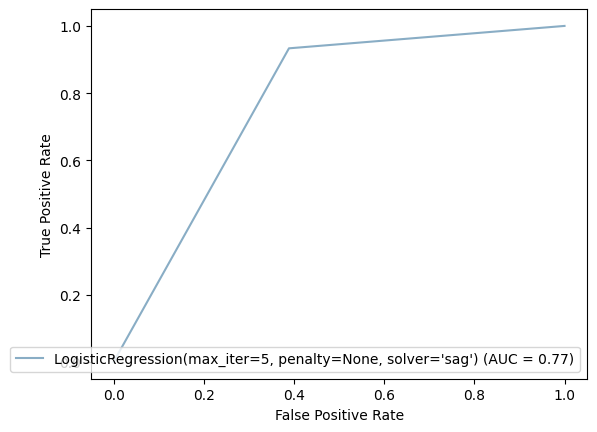

In [94]:
# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_lr)
display.plot()
plt.show()

The AUC value is 0.77

##### Support Vector Classifier

In [95]:
params = {
    'kernel': ['rbf', 'poly', 'linear', 'sigmoid', 'precomputedd'],
    'gamma': ['scale', 'auto'],
    'max_iter': [-1, 1, 2, 5, 7, 10]
    }

In [96]:
gcv = GridSearchCV(SVC(), params, cv=5, scoring='accuracy')
gcv.fit(x1, y1)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid',
                                    'precomputedd'],
                         'max_iter': [-1, 1, 2, 5, 7, 10]},
             scoring='accuracy')

In [97]:
best_params = gcv.best_params_
best_params

{'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1}

In [98]:
model_sv = SVC(**best_params)
model_sv.fit(x1, y1)
y_pred_sv = model_sv.predict(x_test)
accuracy_sv = accuracy_score(y_test, y_pred_sv)
print(accuracy_sv)

0.8160919540229885


The accuracy is 81.61%

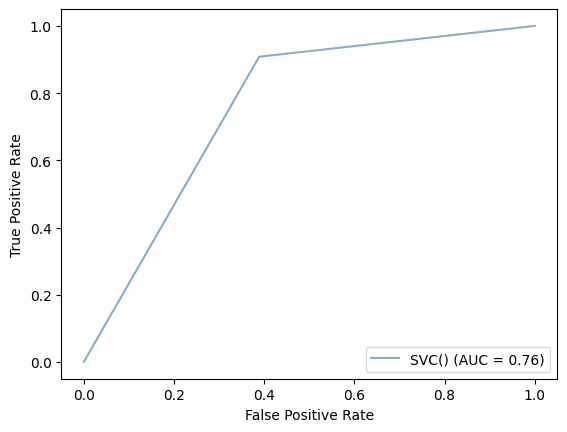

In [99]:
# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sv)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_sv)
display.plot()
plt.show()

The AUC value is 0.76

##### KNN

In [100]:
params = {
    'n_neighbors': [2, 3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform','distance'],
    'metric': ['minkowski','euclidean','manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }

In [101]:
gcv = GridSearchCV(KNeighborsClassifier(), params, cv=5, scoring='accuracy')
gcv.fit(x1, y1)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [2, 3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [102]:
best_params = gcv.best_params_
best_params

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 2,
 'weights': 'distance'}

In [103]:
model_knn = KNeighborsClassifier(**best_params)
model_knn.fit(x1, y1)
y_pred_knn = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(accuracy_knn)

0.7758620689655172


The accuracy is around 77.59% 

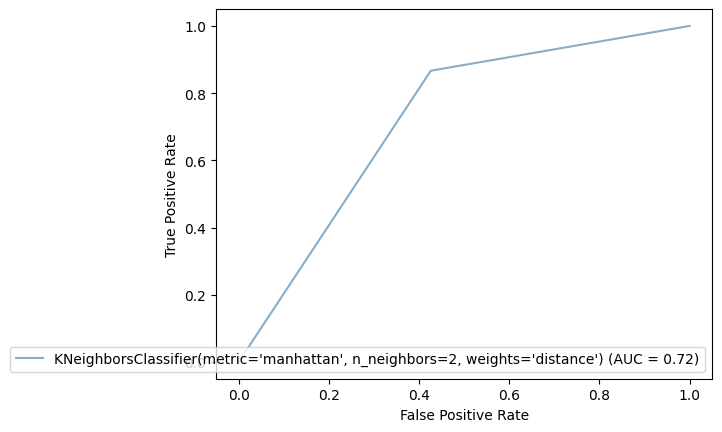

In [104]:
# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_knn)
display.plot()
plt.show()

The AUC is 0.72

##### Decision Tree

In [105]:
params = {
    'max_depth': [None, 1, 2, 3, 5, 10, 20, 25, 30, 50],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'criterion': ["gini", "entropy", "log_loss"]
    }

In [106]:
gcv = GridSearchCV(DecisionTreeClassifier(), params, cv=5, scoring='accuracy')
gcv.fit(x1, y1)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 1, 2, 3, 5, 10, 20, 25, 30, 50],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [107]:
best_params = gcv.best_params_
best_params

{'criterion': 'log_loss',
 'max_depth': 20,
 'min_samples_leaf': 3,
 'min_samples_split': 6}

In [108]:
model_dt = DecisionTreeClassifier(**best_params)
model_dt.fit(x1, y1)
y_pred_dt = model_dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(accuracy_dt)

0.6954022988505747


The accuracy of the model is 69.54%

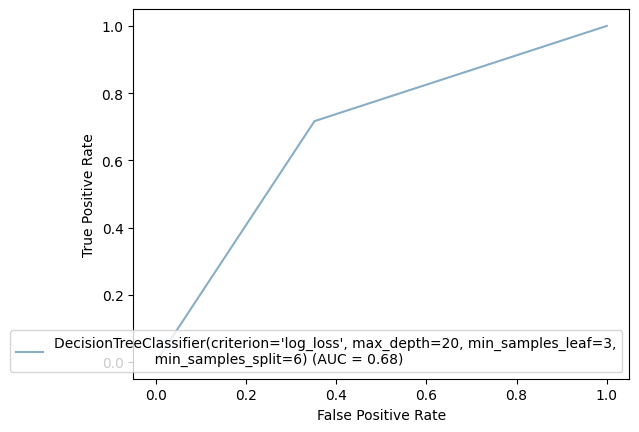

In [109]:
# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_dt)
display.plot()
plt.show()

The AUC value is 0.68

##### Random Forest

In [110]:
params = {
    'max_depth': [None, 10, 100, 200, 500],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [1, 2, 5, 10],
    'bootstrap': [True, False],
    'n_estimators': [10, 25, 50, 70, 100],
    'criterion': ["gini", "entropy", "log_loss"],
    'max_features': ['log2', 'sqrt', None]
    }

In [111]:
gcv = GridSearchCV(RandomForestClassifier(), params, cv=5, scoring='accuracy')
gcv.fit(x1, y1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 100, 200, 500],
                         'max_features': ['log2', 'sqrt', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [1, 2, 5, 10],
                         'n_estimators': [10, 25, 50, 70, 100]},
             scoring='accuracy')

In [112]:
best_params = gcv.best_params_
best_params

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [113]:
model_rf = RandomForestClassifier(**best_params)
model_rf.fit(x1, y1)
y_pred_rf = model_rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(accuracy_rf)

0.8045977011494253


The accuracy is 80.46%

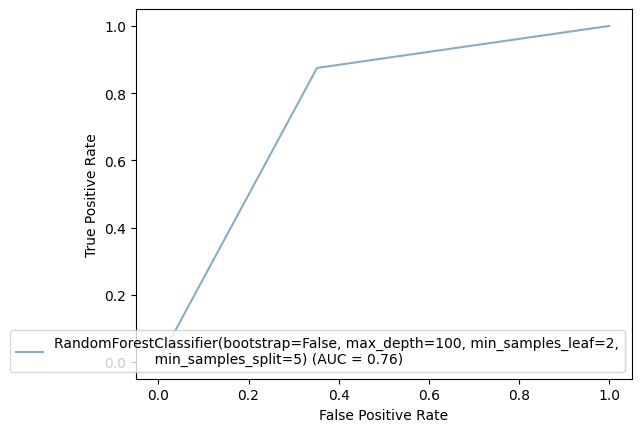

In [114]:
# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_rf)
display.plot()
plt.show()

The AUC value is 0.76

##### Gaussian Naive Bayes

In [115]:
params = {
    'priors': [None],
    'var_smoothing': [0.00000001, 0.000000001, 0.0000000001]
}

In [116]:
gcv = GridSearchCV(GaussianNB(), params, cv=5, scoring='accuracy')
gcv.fit(x1, y1)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [None],
                         'var_smoothing': [1e-08, 1e-09, 1e-10]},
             scoring='accuracy')

In [117]:
best_params = gcv.best_params_
best_params

{'priors': None, 'var_smoothing': 1e-08}

In [119]:
model_gnb = GaussianNB(**best_params)
model_gnb.fit(x1, y1)
y_pred_gnb = model_gnb.predict(x_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(accuracy_gnb)

0.867816091954023


The accuracy is 86.78%

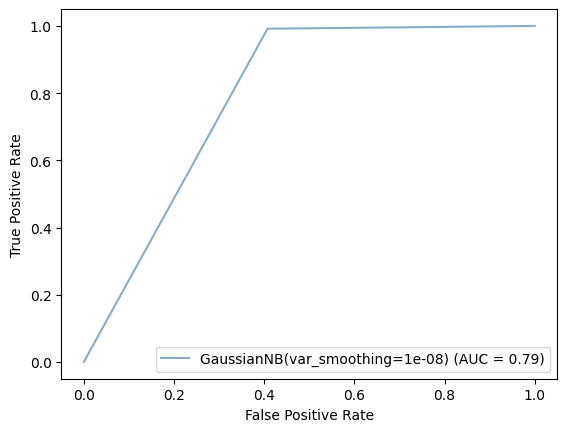

In [120]:
# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gnb)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_gnb)
display.plot()
plt.show()

The AUC value is 0.79

##### Extra Trees

In [121]:
params = {
    'max_depth': [None, 10, 100, 200, 500],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ["gini", "entropy", "log_loss"],
    'n_estimators': [100, 200, 500],
    }

In [122]:
gcv = GridSearchCV(ExtraTreesClassifier(), params, cv=5, scoring='accuracy')
gcv.fit(x1, y1)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 100, 200, 500],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [123]:
best_params = gcv.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': 100,
 'min_samples_leaf': 1,
 'n_estimators': 200}

In [124]:
model_et = ExtraTreesClassifier(**best_params)
model_et.fit(x1, y1)
y_pred_et = model_et.predict(x_test)
accuracy_et = accuracy_score(y_test, y_pred_et)
print(accuracy_et)

0.8160919540229885


The accuracy is 81.61%

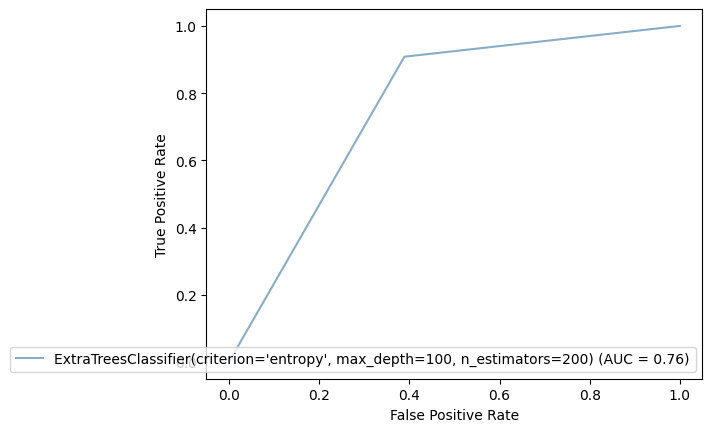

In [125]:
# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_et)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_et)
display.plot()
plt.show()

The AUC value is 0.76

##### AdaBoost

In [126]:
params = {
    'random_state': [None, 0, 5, 10, 15, 20, 25],
    'n_estimators': [50, 100, 500, 700, 1000],
    'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0]
}

In [127]:
gcv = GridSearchCV(AdaBoostClassifier(), params, cv=5, scoring='accuracy')
gcv.fit(x1, y1)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 500, 700, 1000],
                         'random_state': [None, 0, 5, 10, 15, 20, 25]},
             scoring='accuracy')

In [128]:
best_params = gcv.best_params_
best_params

{'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}

In [129]:
model_ad = AdaBoostClassifier(**best_params)
model_ad.fit(x1, y1)
y_pred_ad = model_ad.predict(x_test)
accuracy_ad = accuracy_score(y_test, y_pred_ad)
print(accuracy_ad)

0.7586206896551724


The accuracy is 75.86%

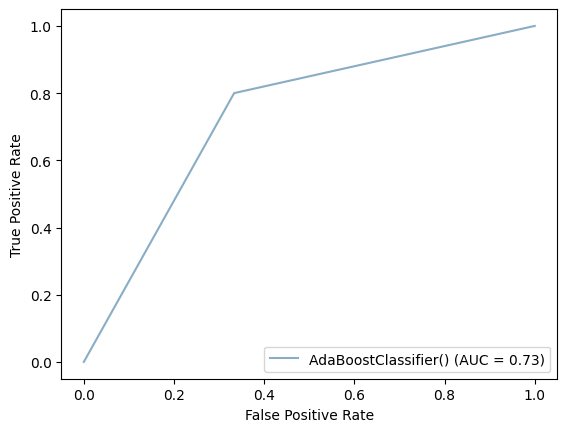

In [130]:
# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ad)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_ad)
display.plot()
plt.show()

The AUC is 0.73

##### Gradient Boosting

In [131]:
params = {
    "n_estimators":[50, 100, 200, 500],
    "max_depth":[None, 1, 3, 5, 7, 9],
    "learning_rate":[0.001, 0.01, 0.1, 1.0],
    "loss": ['log_loss', 'exponential'],
    "criterion": ['friedman_mse', 'squared_error']
    }

In [132]:
gcv = GridSearchCV(GradientBoostingClassifier(), params, cv=5, scoring='accuracy')
gcv.fit(x1, y1)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'loss': ['log_loss', 'exponential'],
                         'max_depth': [None, 1, 3, 5, 7, 9],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='accuracy')

In [133]:
best_params = gcv.best_params_
best_params

{'criterion': 'squared_error',
 'learning_rate': 1.0,
 'loss': 'log_loss',
 'max_depth': 9,
 'n_estimators': 100}

In [134]:
model_gb = GradientBoostingClassifier(**best_params)
model_gb.fit(x1, y1)
y_pred_gb = model_gb.predict(x_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(accuracy_gb)

0.8045977011494253


The accuracy is around 80.46%

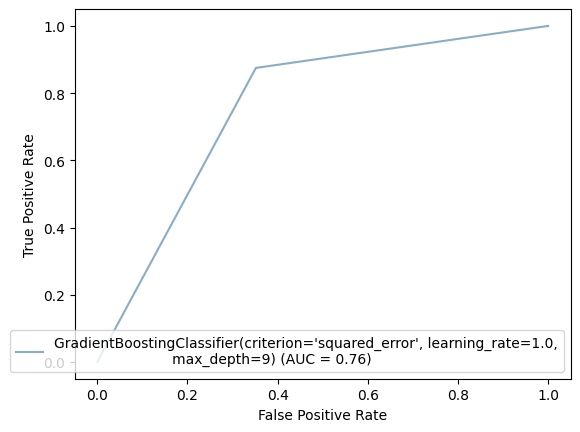

In [135]:
# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_gb)
display.plot()
plt.show()

The AUC value is 0.76

##### XGBoost

In [136]:
params = {
    'max_depth': [1, 2, 3, 5, 6, 7, 10],
    'learning_rate': [0.001, 0.01, 0.1, 1.0],
    'subsample': [0.2, 0.5, 0.7, 1],
    'n_estimators': [10, 50, 100, 200]
    }

In [137]:
gcv = GridSearchCV(xgboost.XGBClassifier(), params, cv=5, scoring='accuracy')
gcv.fit(x1, y1)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'max_depth': [1, 2, 3, 5, 6, 7, 10],
                         'n_estimators': [10, 50, 100, 200],
                         'subsample': [0.2, 0.5, 0.7, 1]},
             scoring='accuracy')

In [138]:
best_params = gcv.best_params_
best_params

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 1}

In [139]:
model_xg = xgboost.XGBClassifier(**best_params)
model_xg.fit(x1, y1)
y_pred_xg = model_xg.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)
print(accuracy_xg)

0.7816091954022989


The accuracy of the model is 78.16%

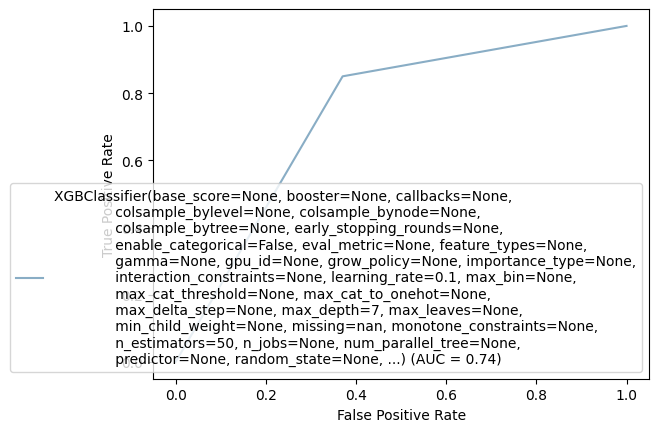

In [140]:
# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xg)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_xg)
display.plot()
plt.show()

The AUC value of the model is 0.74

##### CatBoost

In [141]:
params = {
    'depth': [None, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'iterations': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    }

In [142]:
gcv = GridSearchCV(catboost.CatBoostClassifier(verbose=0), params, cv=5, scoring='accuracy')
gcv.fit(x1, y1)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002252954CA60>,
             param_grid={'depth': [None, 4, 5, 6, 7, 8, 9, 10],
                         'iterations': [None, 10, 20, 30, 40, 50, 60, 70, 80,
                                        90, 100],
                         'learning_rate': [0.001, 0.01, 0.1, 1]},
             scoring='accuracy')

In [143]:
best_params = gcv.best_params_
best_params

{'depth': 9, 'iterations': 70, 'learning_rate': 1}

In [144]:
model_cb = catboost.CatBoostClassifier(verbose=0, **best_params)
model_cb.fit(x1, y1)
y_pred_cb = model_cb.predict(x_test)
accuracy_cb = accuracy_score(y_test, y_pred_cb)
print(accuracy_cb)

0.7586206896551724


The accuracy is 75.86%

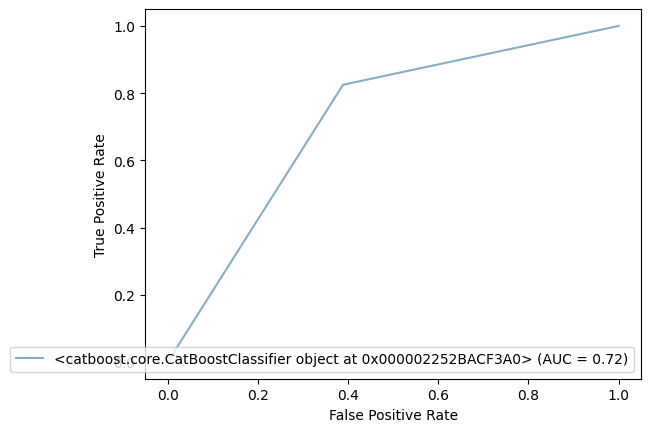

In [145]:
# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_cb)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_cb)
display.plot()
plt.show()

The AUC value is 0.72

The best model based on accuracy and AUC values is the Gaussian Naive Bayes model.

### Saving the model

In [146]:
import pickle

In [147]:
filename = 'loan_status_model.pkl'
pickle.dump(model_gnb, open(filename, 'wb'))

#### Predicting using the saved model

In [148]:
model = pickle.load(open(filename, 'rb'))

pred = model.predict(x_test)

In [149]:
test_df = pd.DataFrame({'Actual': np.array(y_test), 'Predicted': pred})
test_df

,Actual,Predicted
0,1,1
1,1,1
2,0,1
3,0,0
4,1,1
...,...,...
169,0,1
170,1,1
171,0,0
172,1,1


These are the final predictions